In [2]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

In [9]:
years = 20
rate = 0.07  # mean annual rate, e.g. VT ETF
dip_fee = 0.005  # DIP annual fee
contrib_emp = 48000  # employee contributions, max 48000
contrib_comp = 0  # employer contributions, max 50000
contrib = contrib_emp + contrib_comp
tax_rate = 0.23  # income tax rate
socsec_rate = 0.15  # social+healthcare tax rate (employee)
dip_tax_saving = contrib_emp * tax_rate + contrib_comp * (tax_rate + socsec_rate)
dps_state_contrib = 340 * 12
contrib_for_max_state_support = 1700
dps_tax_saving = (contrib_emp - 12 * contrib_for_max_state_support) * tax_rate + contrib_comp * (tax_rate + socsec_rate)
etf_ter = 0.001

In [16]:
res = defaultdict(list)
dip = 0
fees = 0
etf_dip_tax = 0
fees_etf_dip_tax = 0
etf_dps_tax = 0
fees_etf_dps_tax = 0
etf = 0  # benchmark
etf_fees = 0
dps = 0  # doplnkove penzijni sporeni, benchmark
dps_fees = 0

for year in range(1, years + 1):
    dip = (dip + contrib) * (1 + rate)
    fee = dip * (dip_fee + etf_ter)
    dip -= fee
    fees += fee
    res["dip"].append(dip)
    res["fees"].append(fees)

    etf_dip_tax = (etf_dip_tax + dip_tax_saving) * (1 + rate)
    fee = etf_dip_tax * etf_ter
    etf_dip_tax -= fee
    fees_etf_dip_tax += fee
    res["etf_dip_tax"].append(etf_dip_tax)
    res["fees_etf_dip_tax"].append(fees_etf_dip_tax)
    
    etf = (etf + contrib) * (1 + rate)
    fee = etf * etf_ter
    etf_fees += fee
    etf -= fee
    res["etf"].append(etf)
    res["etf_fees"].append(fee)
    
    dps = (dps + contrib + dps_state_contrib) * (1 + rate)
    fee = dps * (0.015 + etf_ter)  # on average DSP costs 1.5% annually
    dps -= fee
    dps_fees += fee
    res["dps"].append(dps)
    res["dps_fees"].append(dps_fees)

    etf_dps_tax = (etf_dps_tax + dps_tax_saving) * (1 + rate)
    fee = etf_dps_tax * etf_ter
    etf_dps_tax -= fee
    fees_etf_dps_tax += fee
    res["etf_dps_tax"].append(etf_dps_tax)
    res["fees_etf_dps_tax"].append(fees_etf_dps_tax)

res = pd.DataFrame(res)
res["dps_reinvest"] = res.dps + res.etf_dps_tax
res["dps_reinvest_fees"] = res.dps_fees + res.fees_etf_dps_tax
res["dip_reinvest"] = res.dip + res.etf_dip_tax
res["dip_reinvest_fees"] = res.fees + res.fees_etf_dip_tax
res

,dip,fees,etf_dip_tax,fees_etf_dip_tax,etf,etf_fees,dps,dps_fees,etf_dps_tax,fees_etf_dps_tax,dps_reinvest,dps_reinvest_fees,dip_reinvest,dip_reinvest_fees
0,5.105184e+04,308.160000,11800.987200,11.812800,5.130864e+04,51.360000,5.483399e+04,891.609600,6785.567640,6.792360,6.161956e+04,898.401960,6.285283e+04,319.972800
1,1.053496e+05,944.072813,24415.416448,36.252656,1.061540e+05,106.260245,1.125676e+05,2721.977116,14038.864457,20.845277,1.266065e+05,2742.822393,1.297650e+05,980.325469
2,1.630995e+05,1928.576962,37899.358303,74.189952,1.647798e+05,164.944763,1.733542e+05,5540.744066,21792.131024,42.659222,1.951463e+05,5583.403288,2.009989e+05,2002.766914
3,2.245212e+05,3283.835885,52312.748271,126.555065,2.274467e+05,227.674406,2.373551e+05,9400.177012,30079.830256,72.769163,2.674350e+05,9472.946174,2.768340e+05,3410.390951
4,2.898481e+05,5033.422171,67719.653210,194.342506,2.944333e+05,294.728003,3.047405e+05,14355.306372,38938.800596,111.746941,3.436793e+05,14467.053313,3.575678e+05,5227.764677
5,3.593285e+05,7202.407153,84188.556105,278.615335,3.660372e+05,366.403604,3.756891e+05,20464.072573,48408.419761,160.203818,4.240975e+05,20624.276391,4.435171e+05,7481.022488
6,4.332265e+05,9817.456200,101792.660478,380.509890,4.425768e+05,443.019804,4.503896e+05,27787.479931,58530.779775,218.793187,5.089203e+05,28006.273117,5.350191e+05,10197.966089
7,5.118228e+05,12906.930065,120610.215764,501.240837,5.243922e+05,524.917160,5.290401e+05,36389.758669,69350.874065,288.213481,5.983910e+05,36677.972150,6.324331e+05,13408.170901
8,5.954164e+05,16500.992678,140724.865137,642.106567,6.118472e+05,612.459699,6.118498e+05,46338.535508,80916.797454,369.211276,6.927666e+05,46707.746784,7.361412e+05,17143.099246
9,6.843248e+05,20631.725793,162226.017291,804.494973,7.053305e+05,706.036547,6.990384e+05,57705.013266,93279.959942,462.584610,7.923183e+05,58167.597875,8.465508e+05,21436.220766


<Axes: >

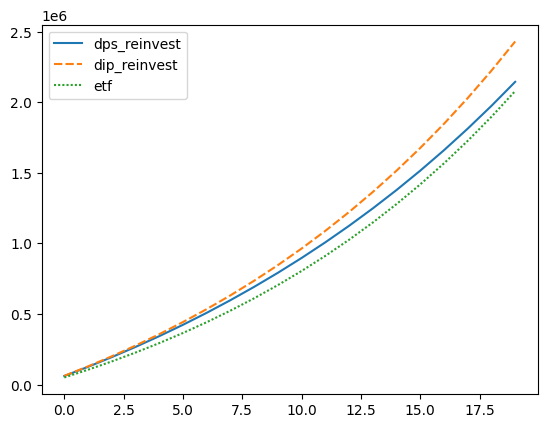

In [17]:
sns.lineplot(res[["dps_reinvest", "dip_reinvest", "etf"]])

<Axes: >

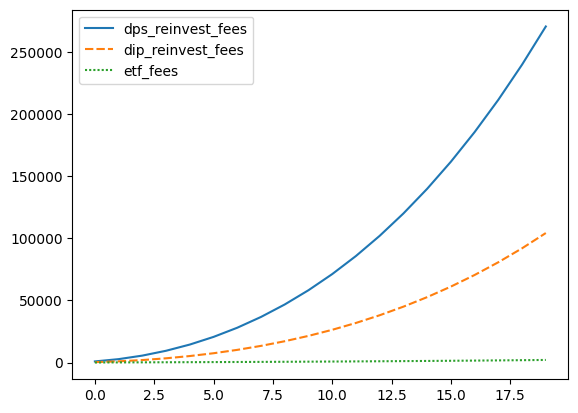

In [18]:
sns.lineplot(res[["dps_reinvest_fees", "dip_reinvest_fees", "etf_fees"]])